## Import dependencies

In [1]:
import numpy as np
import sys
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn
import xarray as xr
import glob

from fair import *
from fair.scripts.stats import *

%matplotlib inline

## Data import & wrangling

In [2]:
## Import Arora (2020) data

fnames = ['../../aux/input-data/_hidden/model_output_cmip6/JAMSTEC/JAMSTEC_1pc_COU.txt',
 '../../aux/input-data/_hidden/model_output_cmip6/JAMSTEC/JAMSTEC_1pc_RAD.txt',
 '../../aux/input-data/_hidden/model_output_cmip6/JAMSTEC/JAMSTEC_1pc_BGC.txt',
 '../../aux/input-data/_hidden/model_output_cmip6/JAMSTEC/JAMSTEC_PI_CONTROL.txt',
 '../../aux/input-data/_hidden/model_output_cmip6/ACCESS-ESM1.5/ACCESS-ESM1.5_PI_CONTROL.txt',
 '../../aux/input-data/_hidden/model_output_cmip6/ACCESS-ESM1.5/ACCESS-ESM1.5_1pc_COU.txt',
 '../../aux/input-data/_hidden/model_output_cmip6/ACCESS-ESM1.5/ACCESS-ESM1.5_1pc_BGC.txt',
 '../../aux/input-data/_hidden/model_output_cmip6/ACCESS-ESM1.5/ACCESS-ESM1.5_1pc_RAD.txt',
 '../../aux/input-data/_hidden/model_output_cmip6/CNRM-ESM2.1/CNRM-ESM2.1_1pc_RAD.txt',
 '../../aux/input-data/_hidden/model_output_cmip6/CNRM-ESM2.1/CNRM-ESM2.1_1pc_COU.txt',
 '../../aux/input-data/_hidden/model_output_cmip6/CNRM-ESM2.1/CNRM-ESM2.1_PI_CONTROL.txt',
 '../../aux/input-data/_hidden/model_output_cmip6/CNRM-ESM2.1/CNRM-ESM2.1_1pc_BGC.txt',
 '../../aux/input-data/_hidden/model_output_cmip6/IPSL/IPSL_1pc_COU.txt',
 '../../aux/input-data/_hidden/model_output_cmip6/IPSL/IPSL_1pc_RAD.txt',
 '../../aux/input-data/_hidden/model_output_cmip6/IPSL/IPSL_PI_CONTROL.txt',
 '../../aux/input-data/_hidden/model_output_cmip6/IPSL/IPSL_1pc_BGC.txt',
 '../../aux/input-data/_hidden/model_output_cmip6/CanESM5/CanESM5_1pc_BGC.txt',
 '../../aux/input-data/_hidden/model_output_cmip6/CanESM5/CanESM5_1pc_COU.txt',
 '../../aux/input-data/_hidden/model_output_cmip6/CanESM5/CanESM5_1pc_RAD.txt',
 '../../aux/input-data/_hidden/model_output_cmip6/CanESM5/CanESM5_PI_CONTROL.txt',
 '../../aux/input-data/_hidden/model_output_cmip6/GFDL/GFDL_1pc_COU.txt',
 '../../aux/input-data/_hidden/model_output_cmip6/GFDL/GFDL_PI_CONTROL.txt',
 '../../aux/input-data/_hidden/model_output_cmip6/GFDL/GFDL_1pc_RAD.txt',
 '../../aux/input-data/_hidden/model_output_cmip6/GFDL/GFDL_1pc_BGC.txt',
 '../../aux/input-data/_hidden/model_output_cmip6/MPIESM/MPIESM_1pc_BGC.txt',
 '../../aux/input-data/_hidden/model_output_cmip6/MPIESM/MPIESM_1pc_COU.txt',
 '../../aux/input-data/_hidden/model_output_cmip6/MPIESM/MPIESM_1pc_RAD.txt',
 '../../aux/input-data/_hidden/model_output_cmip6/MPIESM/MPIESM_PI_CONTROL.txt',
 '../../aux/input-data/_hidden/model_output_cmip6/CESM2/CESM2_1pc_BGC.txt',
 '../../aux/input-data/_hidden/model_output_cmip6/CESM2/CESM2_1pc_COU.txt',
 '../../aux/input-data/_hidden/model_output_cmip6/CESM2/CESM2_PI_CONTROL.txt',
 '../../aux/input-data/_hidden/model_output_cmip6/CESM2/CESM2_1pc_RAD.txt',
 '../../aux/input-data/_hidden/model_output_cmip6/UKESM/UKESM_1pc_COU.txt',
 '../../aux/input-data/_hidden/model_output_cmip6/UKESM/UKESM_PI_CONTROL.txt',
 '../../aux/input-data/_hidden/model_output_cmip6/UKESM/UKESM_1pc_BGC.txt',
 '../../aux/input-data/_hidden/model_output_cmip6/UKESM/UKESM_1pc_RAD.txt',
 '../../aux/input-data/_hidden/model_output_cmip6/BCC/BCC_1pc_COU.txt',
 '../../aux/input-data/_hidden/model_output_cmip6/BCC/BCC_1pc_BGC.txt',
 '../../aux/input-data/_hidden/model_output_cmip6/BCC/BCC_1pc_RAD.txt',
 '../../aux/input-data/_hidden/model_output_cmip6/BCC/BCC_PI_CONTROL.txt',
 '../../aux/input-data/_hidden/model_output_cmip6/NorESM2LM/NorESM2LM_PI_CONTROL_v2.txt',
 '../../aux/input-data/_hidden/model_output_cmip6/NorESM2LM/NorESM2LM_1pc_BGC_v2.txt',
 '../../aux/input-data/_hidden/model_output_cmip6/NorESM2LM/NorESM2LM_1pc_RAD_v2.txt',
 '../../aux/input-data/_hidden/model_output_cmip6/NorESM2LM/NorESM2LM_1pc_COU_v2.txt']

def get_C4MIP_data(x):
    if x == '../../aux/input-data/_hidden/model_output_cmip6/UKESM/UKESM_PI_CONTROL.txt':
        return pd.read_csv(x,delim_whitespace=True,index_col=0,skiprows=1,names=['year','ST','CO2','LA_CO2_FLUX','OA_CO2_FLUX','GPP','NPP','HETRES','CLIVE','CDEAD'])
    else:
        return pd.read_csv(x,delim_whitespace=True,index_col=0)
    
C4MIP_data = pd.concat([get_C4MIP_data(x) for x in fnames],axis=1,keys=['.'.join(x.split('/')[-1].split('.')[0:-1]) for x in fnames]).astype(float)

In [3]:
map_models = dict(zip(['JAMSTEC','ACCESS-ESM1.5','CNRM-ESM2.1','IPSL','CanESM5','GFDL','MPIESM','CESM2','UKESM','BCC','NorESM2LM'],\
                   ['MIROC-ES2L','ACCESS-ESM1-5','CNRM-ESM2-1','IPSL-CM6A-LR','CanESM5','GFDL-ESM4','MPI-ESM1-2-LR','CESM2','UKESM1-0-LL','BCC-CSM2-MR','NorESM2-LM']))

map_exp = dict(zip(['COU','BGC','RAD','CONTROL'],['1pctCO2','1pctCO2-bgc','1pctCO2-rad','piControl']))

map_flux_direction = dict(zip(map_models.keys(),[1,-1,1,1,1,1,-1,1,-1,-1,-1]))

C4MIP_input = pd.DataFrame(columns=pd.MultiIndex.from_product([list(map_models.values()),['1pctCO2','1pctCO2-bgc','1pctCO2-rad','piControl'],['tas','CO2','flux']]),index=np.arange(0,151),dtype=float)

for modmem in C4MIP_data.columns.levels[0]:
    exp = modmem.split('_')[2]
    model = modmem.split('_')[0]
    currdata = C4MIP_data.loc[:,modmem].dropna(how='all')
    
    ## get tas +
    picontrol_idx = model+'_PI_CONTROL' + (model=='NorESM2LM')*'_v2'
    
    # compute anomalies based on linear regression over first 20 years of 1pct data
    C4MIP_input.loc[:currdata.shape[0]-1,(map_models[model],map_exp[exp],'tas')] = currdata.loc[:,'ST'].values - sp.stats.linregress(np.arange(1,21),currdata.loc[:,'ST'].values[:20]).intercept
    
    C4MIP_input.loc[:currdata.shape[0]-1,(map_models[model],map_exp[exp],'CO2')] = currdata.loc[:,'CO2'].values
    
    # compute anomalies by removing piControl mean
    C4MIP_input.loc[:currdata.shape[0]-1,(map_models[model],map_exp[exp],'flux')] = map_flux_direction[model]*(currdata.loc[:,'OA_CO2_FLUX'].values+currdata.loc[:,'LA_CO2_FLUX'].values - np.mean(C4MIP_data.loc[:,(picontrol_idx,'OA_CO2_FLUX')].dropna().values+C4MIP_data.loc[:,(picontrol_idx,'LA_CO2_FLUX')].dropna().values))
    
C4MIP_input.drop('piControl',axis=1,level=1,inplace=True)
# C4MIP_input = C4MIP_input.astype(float)

In [4]:
C4MIP_input.head()

MIROC-ES2L                                                              \
     1pctCO2                   1pctCO2-bgc                   1pctCO2-rad   
         tas     CO2      flux         tas     CO2      flux         tas   
0   0.038684  284.62 -0.160733   -0.009316  284.62 -0.200733    0.053211   
1   0.138684  287.47 -0.840733    0.170684  287.47 -1.110733    0.133211   
2  -0.051316  290.34  1.319267   -0.039316  290.34  0.619267    0.103211   
3  -0.031316  293.25  2.339267   -0.149316  293.25  2.179267    0.053211   
4   0.068684  296.18  2.219267   -0.029316  296.18  3.039267   -0.016789   

                    ACCESS-ESM1-5  ... BCC-CSM2-MR NorESM2-LM          \
                          1pctCO2  ... 1pctCO2-rad    1pctCO2           
      CO2      flux           tas  ...        flux        tas     CO2   
0  284.62  0.939267      0.016842  ...   -0.261289   0.099316  284.67   
1  287.47 -0.440733      0.196842  ...   -0.237489   0.149316  287.17   
2  290.34 -0.510733      0.186842  ...   -0.046289   0.239316  290.04   
3  293.25 -0.160733     -0.023158  ...   -1.457889   0.049316  292.94   
4  296.18 -0.470733      0.146842  ...   -0.297889   0.189316  295.87   

                                                                         
            1pctCO2-bgc                   1pctCO2-rad                    
       flux         tas     CO2      flux         tas     CO2      flux  
0  0.427286    0.090211  284.67  0.577286    0.018474  284.32  0.287286  
1  0.667286    0.140211  287.17 -0.372714    0.048474  284.32 -0.132714  
2  0.727286    0.040211  290.04  0.907286    0.028474  284.32  0.367286  
3  1.887286   -0.129789  292.94  1.637286    0.028474  284.32  0.117286  
4  1.477286   -0.149789  295.87  2.467286    0.178474  284.32 -0.282714  

[5 rows x 99 columns]

## Tuning the FaIR carbon cycle

Methodology is to estimate the iIRF$_{100}$ value based on the raw C4MIP data & then fit this to the FaIr parameterisation by ordinary least squares.

### diagnosing iIRF100

In [5]:
def calc_R(x,R_old,E,a,tau,dt=1):
    return a*E*x*tau*( 1- np.exp(-dt/(x*tau)) ) + R_old*np.exp(-dt/(x*tau))

In [6]:
base_cc_params = get_gas_parameter_defaults()[('default','carbon_dioxide')]
a = base_cc_params.loc['a1':'a4'].values
tau = base_cc_params.loc['tau1':'tau4'].values

In [7]:
# use timesteps of 5 years to invert C4MIP data otherwise highly unstable
dt = 5
alpha_df = pd.DataFrame(index=np.arange(dt,151,dt)-1,columns= pd.MultiIndex.from_product([C4MIP_input.columns.levels[0],['1pctCO2','1pctCO2-bgc']]),dtype=float)

for exp in ['1pctCO2','1pctCO2-bgc']:
    for model in alpha_df.columns.levels[0]:
        atms_burden = (C4MIP_input.loc[:,(model,exp,'CO2')].dropna()-C4MIP_input.loc[:,(model,exp,'CO2')].dropna().iloc[0]/1.01)/4.688876e-01
        cum_emms = (C4MIP_input.loc[:,(model,exp,'flux')].cumsum() + atms_burden).dropna()
        emms = cum_emms.diff()
        emms.loc[0] = cum_emms.loc[0]
        
        R = np.zeros((emms.size//dt,4))

        alpha_df[(model,exp)].iloc[0] = sp.optimize.newton(lambda x: np.sum(calc_R(x,0,emms.loc[:dt-1].mean(),a,tau,dt)) - atms_burden.loc[dt-1],x0=0.1)
        R[0] = calc_R(alpha_df[(model,exp)].iloc[0],0,emms.loc[:dt-1].mean(),a,tau,dt)

        for t in np.arange(1,R.shape[0]):
            alpha_df[(model,exp)].iloc[t] = sp.optimize.newton(lambda x: np.sum(calc_R(x,R[t-1],emms.loc[t*dt:(t+1)*dt-1].mean(),a,tau,dt)) - atms_burden.loc[(t+1)*dt-1],x0=0.1)
            R[t] = calc_R(alpha_df[(model,exp)].iloc[t],R[t-1],emms.loc[t*dt:(t+1)*dt-1].mean(),a,tau,dt)

In [8]:
g1_exp = np.sum( a * tau * ( 1. - ( 1. + 100/tau ) * np.exp(-100/tau) ), axis=-1 )
g0_exp = ( np.exp( np.sum( a * tau * ( 1. - np.exp(-100/tau) ) , axis=-1) / g1_exp ) )**(-1.)
iIRF100 = g1_exp*np.log(alpha_df/g0_exp)

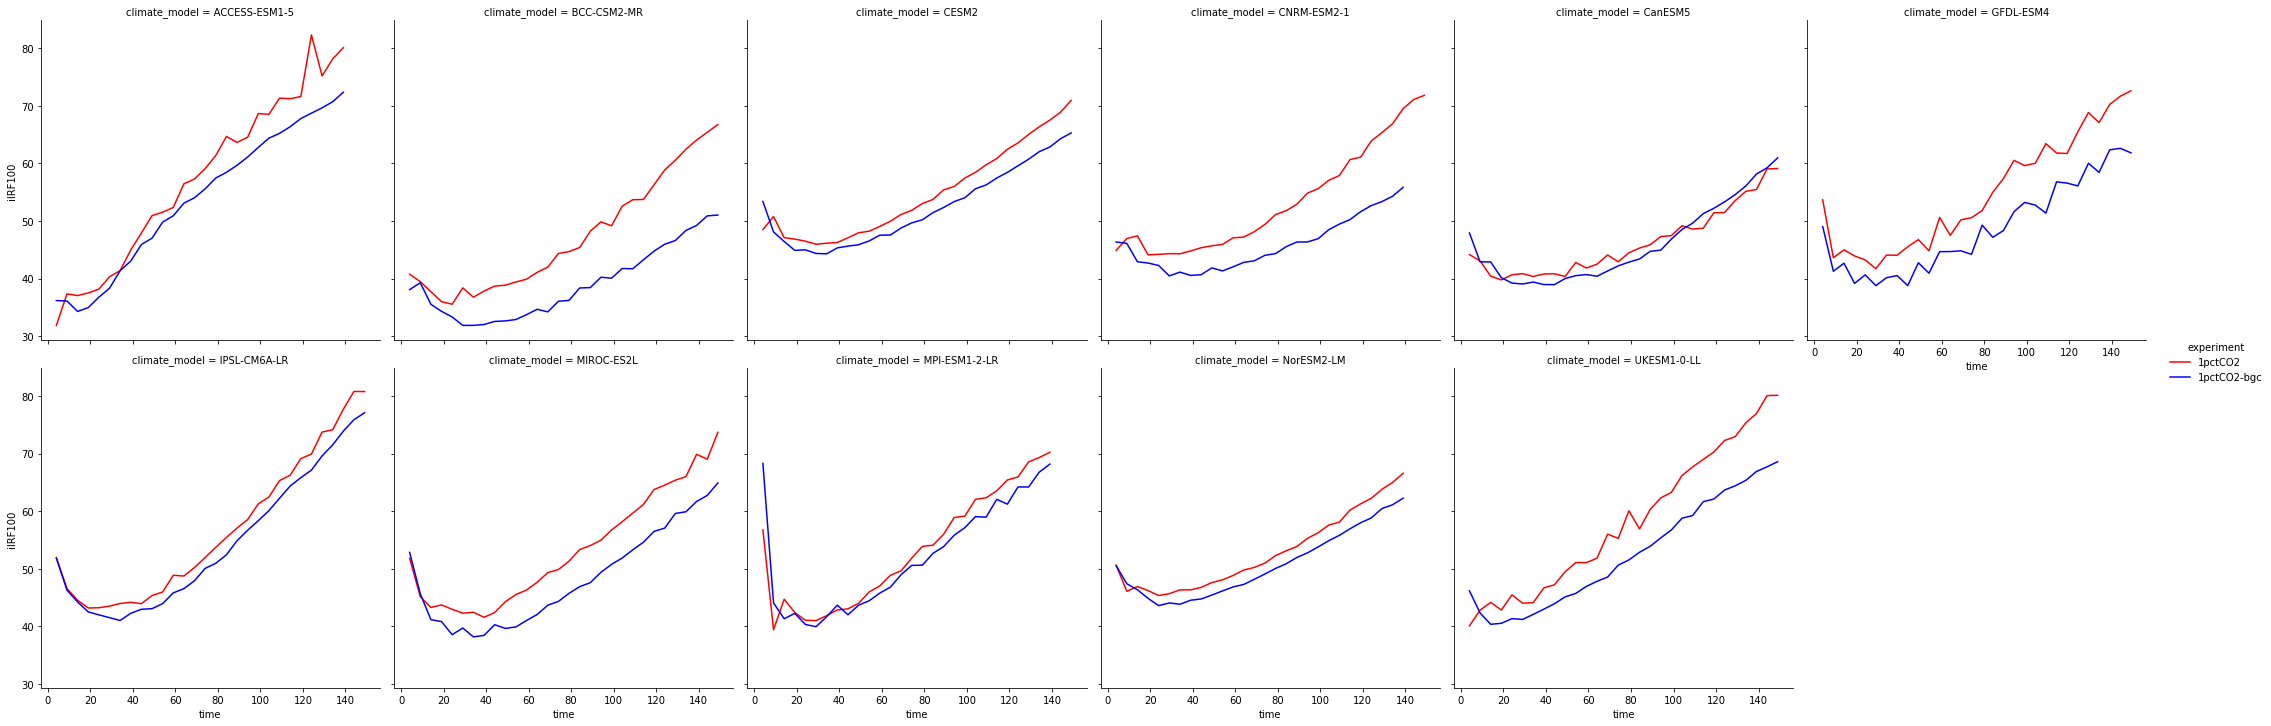

In [9]:
## plot resulting diagnosed iIRF100 to check if it seems reasonable
sn.relplot(data=iIRF100.unstack().reset_index().rename({0:'iIRF100','level_0':'climate_model','level_1':'experiment','level_2':'time'},axis=1),
           x='time',
           y='iIRF100',
           col='climate_model',
           col_wrap=6,
           hue='experiment',
           palette=['r','b'],
           kind='line'
          )

### Regressing against FaIR parameterisation

In the FaIRv2 carbon cycle, iIRF100 is parameterised as a function of cumulative carbon uptake (GtC), atmospheric burden (GtC), and temperature (K).

We therefore use an ordinary least squares estimator to compute the $r$ parameters from the diagnosed iIRF100 timeseries:

$$
\text{iIRF}_{100}=r_0 + r_U \cdot \text{uptake} + r_A \cdot \text{burden} + r_T \cdot \text{temperature}
$$

In [10]:
CMIP6_cc_full_fit = pd.DataFrame(columns = C4MIP_input.columns.levels[0],index=['r0','rU','rT','rA'],dtype=float)
CMIP6_cc_redu_fit = pd.DataFrame(columns = C4MIP_input.columns.levels[0],index=['r0','rU','rT','rA'],dtype=float)
CMIP6_cc_redu_fit.loc['rA'] = 0

experiments = ['1pctCO2','1pctCO2-bgc']
start_year = 60 # this is to avoid including the initial adjustment that the FaIRv2.0 carbon cycle cannot capture in the fits, instead focussing on the long-term behaviour.
ppm_to_GtC = 1/0.4688875938875939

for model in CMIP6_cc_full_fit.columns:
    
    Y = iIRF100.loc[start_year:,model].dropna().sort_index(axis=1).values.flatten()[:,None]
    
    X_0 = C4MIP_input[model].reindex(experiments,axis=1,level=0).dropna()
    
    x0 = X_0.xs('flux',axis=1,level=1).cumsum().rolling(5).mean().iloc[4::5].loc[start_year:].values.flatten()
    x1 = X_0.xs('tas',axis=1,level=1).rolling(5).mean().iloc[4::5].loc[start_year:].values.flatten()
    x2 = ppm_to_GtC*(X_0.xs('CO2',axis=1,level=1)-X_0.xs('CO2',axis=1,level=1).loc[0]/(1.01**0.5)).rolling(5).mean().iloc[4::5].loc[start_year:].values.flatten()
    
    X = np.stack((x0,x1,x2),axis=-1)
    
    _lr_full = OLSE_NORM(X,Y)
    
    CMIP6_cc_full_fit.loc['r0',model] = _lr_full['intercept'][0]
    CMIP6_cc_full_fit.loc[['rU','rT','rA'],model] = _lr_full['coefs'][:,0]
    
    X = np.stack((x0,x1),axis=-1)
    
    _lr_redu = OLSE_NORM(X,Y)
    
    CMIP6_cc_redu_fit.loc['r0',model] = _lr_redu['intercept'][0]
    CMIP6_cc_redu_fit.loc[['rU','rT'],model] = _lr_redu['coefs'][:,0]

## CMIP6 verification against FaIR inverse carbon cycle

In [11]:
from FaIR_tuning_scripts import *

In [12]:
cc_plot_data = pd.DataFrame(index=pd.Index(C4MIP_input.index.values,name='time'),columns=pd.MultiIndex.from_product([CMIP6_cc_full_fit.columns,['1pctCO2','1pctCO2-bgc'],['C4MIP','FaIR_full','FaIR_redu'],['emms','cum_emms','CO2','CO2_frac','AF','tas']],names=['climate_model','experiment','simulation','variable']),dtype=float)

for model in CMIP6_cc_full_fit.columns:
    for experiment in ['1pctCO2','1pctCO2-bgc']:

        # 1pctCO2-COU run
        model_data = C4MIP_input[(model,experiment)].dropna().astype(float)
        PI_conc = model_data['CO2'].values[0]/(1.01**0.5)
        C = np.concatenate(([PI_conc],model_data['CO2'].values))
        T = np.concatenate(([0],model_data['tas'].values))
        A_burden = np.diff(C-PI_conc)*ppm_to_GtC
        model_emms = A_burden + model_data['flux'].values

        cc_plot_data.loc[model_data.index,(model,experiment,'C4MIP')] = np.vstack((model_emms,np.cumsum(model_emms),model_data['CO2'].values,model_data['CO2'].values/PI_conc,A_burden/model_emms,model_data['tas'].values)).T

        FaIR_full_diagnosed = invert_carbon_cycle_prescribed_T(C,
                                                               T,
                                                               a,
                                                               tau,
                                                               CMIP6_cc_full_fit[model].values,
                                                               PI_conc,
                                                               0.4688875938875939)['emms'].values[:-1] # there's one year too many from the diagnosis

        cc_plot_data.loc[model_data.index,(model,experiment,'FaIR_full')] = np.vstack((FaIR_full_diagnosed,np.cumsum(FaIR_full_diagnosed),model_data['CO2'].values,model_data['CO2'].values/PI_conc,A_burden/FaIR_full_diagnosed,model_data['tas'].values)).T

        FaIR_redu_diagnosed = invert_carbon_cycle_prescribed_T(C,
                                                               T,
                                                               a,
                                                               tau,
                                                               CMIP6_cc_redu_fit[model].values,
                                                               PI_conc,
                                                               0.4688875938875939)['emms'].values[:-1] # there's one year too many from the diagnosis

        cc_plot_data.loc[model_data.index,(model,experiment,'FaIR_redu')] = np.vstack((FaIR_redu_diagnosed,np.cumsum(FaIR_redu_diagnosed),model_data['CO2'].values,model_data['CO2'].values/PI_conc,A_burden/FaIR_redu_diagnosed,model_data['tas'].values)).T
        
cc_plot_data = cc_plot_data.stack(level=[0,1,2]).reset_index()

/home/leachl/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2887: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/home/leachl/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2887: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/home/leachl/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2887: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/home/leachl/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2887: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/home/leachl/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2887: PerformanceWarning: indexing past lexsort depth may impac

In [13]:
### a few different view of the data

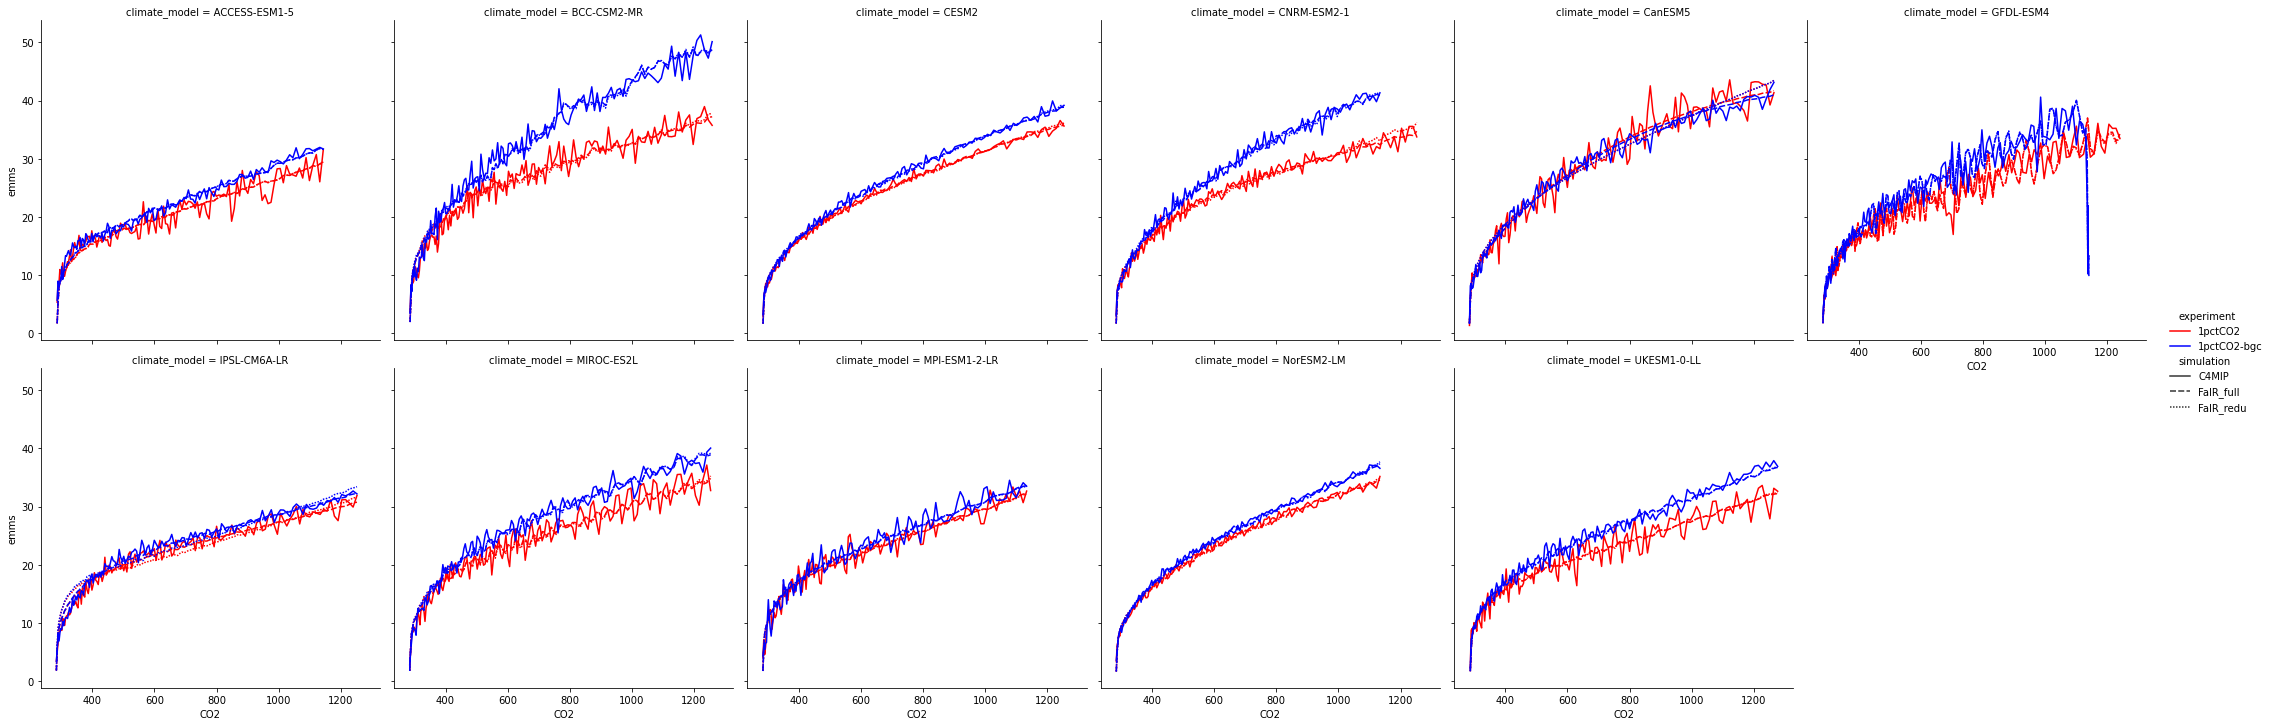

In [14]:
g=sn.relplot(data=cc_plot_data,
             x='CO2',
             y='emms',
             col='climate_model',
             col_wrap=6,
             style='simulation',
             hue='experiment',
             palette=['r','b'],
             kind='line')

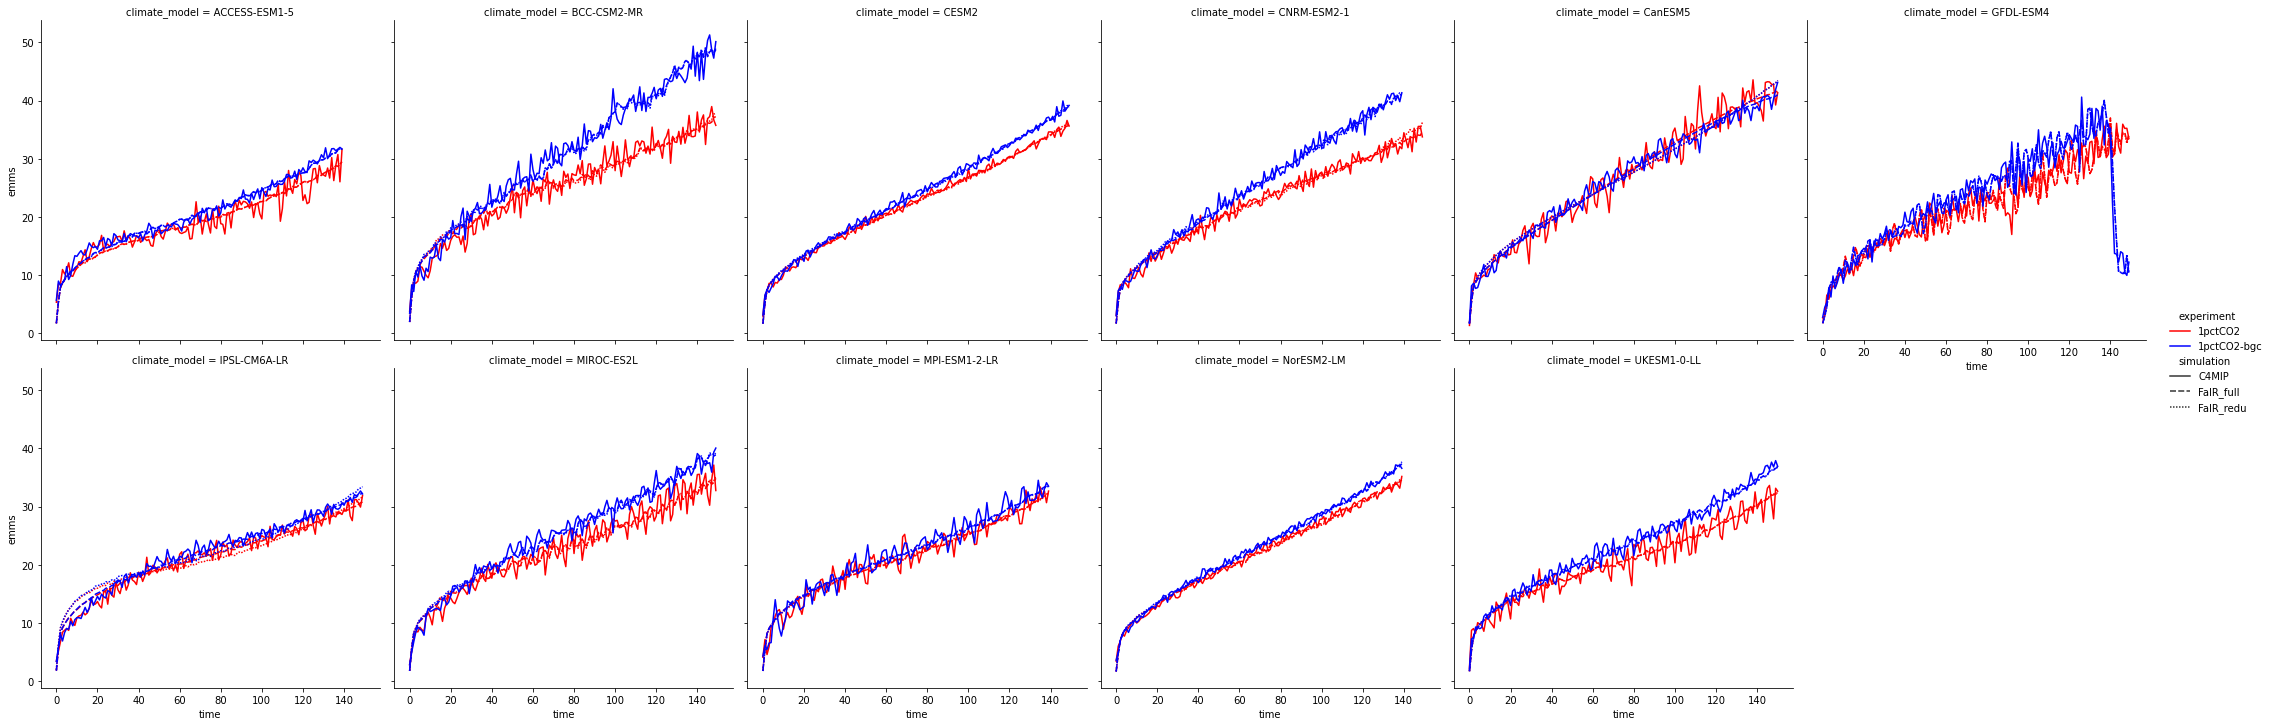

In [15]:
g=sn.relplot(data=cc_plot_data,
             x='time',
             y='emms',
             col='climate_model',
             col_wrap=6,
             style='simulation',
             hue='experiment',
             palette=['r','b'],
             kind='line')

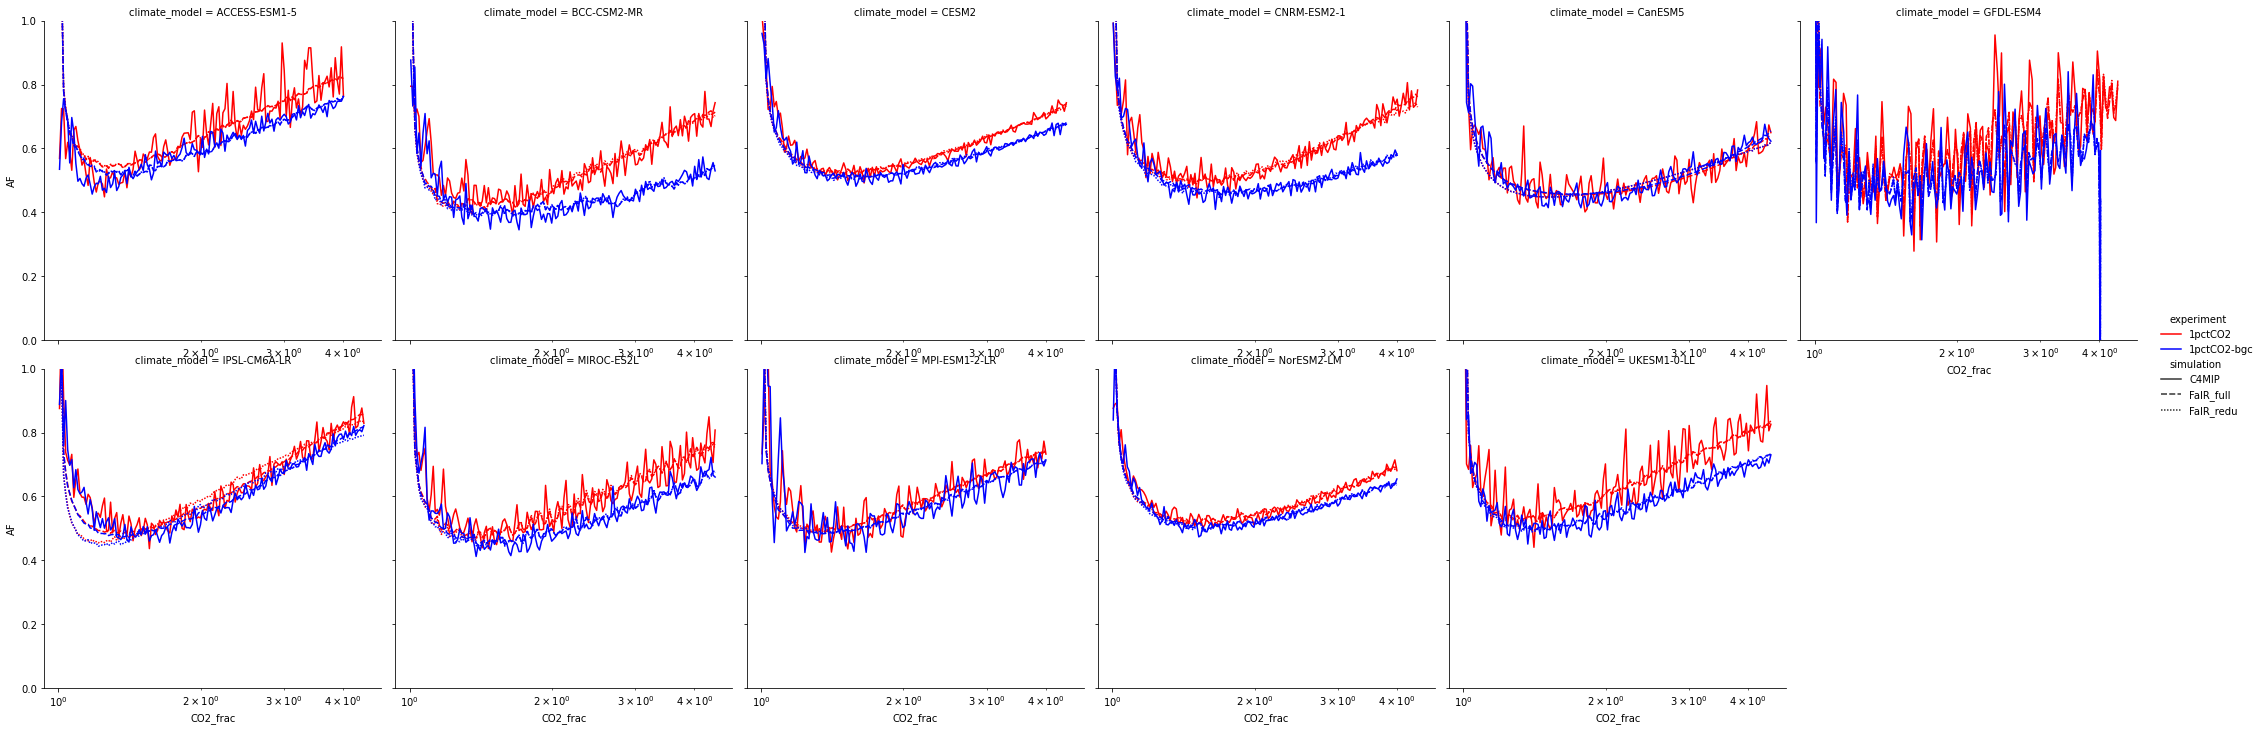

In [16]:
g=sn.relplot(data=cc_plot_data,
             x='CO2_frac',
             y='AF',
             col='climate_model',
             col_wrap=6,
             style='simulation',
             hue='experiment',
             palette=['r','b'],
             kind='line')

g.set(xscale="log",ylim=[0,1])


#### Notes

Including an atmospheric burden dependence to the iIRF${100}$ parameterisation notably improves the C4MIP emulation for a few models, in particular IPSL & CanESM. For most other models, the additional parameter makes little difference. 

For proper emulation, we use the full parameterisation, but for incorporating carbon-cycle uncertainty in the perturbed parameter ensemble, we infer the prior parameter distributions from the reduced parameterisation.

## Save output for use elsewhere

In [17]:
# CMIP6_cc_redu_fit.to_csv('../../aux/parameter-sets/CMIP6_cc_reduced.csv')

In [18]:
# CMIP6_cc_full_fit.to_csv('../../aux/parameter-sets/CMIP6_cc_full.csv')

In [19]:
#definition to round to set sfs:
def round_to_sf(x,sf):
    if x==0:
        return 0
    if np.isnan(x):
        return '-'
    else:
        num= round(x, sf - int(np.floor(np.log10(abs(x)))))
        if abs(num)>10**sf:
            return str(int(num))
        else:
            return str(num)

In [25]:
cc_table = CMIP6_cc_full_fit.rename(dict(r0='$r_0$',rU='$r_u$',rT='$r_T$',rA='$r_a$')).T.applymap(lambda x:round_to_sf(x,2))
cc_table.index.name='model'
cc_table.columns.name='parameter'
cc_table#.to_latex('../../docs/manuscript/tables/Tab3',escape=False,bold_rows=True)

parameter,$r_0$,$r_u$,$r_T$,$r_a$
model,,,,
ACCESS-ESM1-5,36.7,0.035,3.04,-0.00066
BCC-CSM2-MR,25.6,0.00598,5.2,0.00439
CESM2,40.7,0.0107,1.28,0.00421
CNRM-ESM2-1,38.1,0.000581,2.47,0.00978
CanESM5,35.7,-0.00596,-0.104,0.0181
GFDL-ESM4,34.3,0.0219,4.86,-0.00424
IPSL-CM6A-LR,32.2,0.0166,1.07,0.0123
MIROC-ES2L,33.4,0.0131,3.46,0.00399
MPI-ESM1-2-LR,33.3,0.031,1.5,-0.00257


## Create plot for the paper

set some matplotlib rcParams

In [21]:
matplotlib.rcParams['font.family']='Helvetica'
matplotlib.rcParams['font.size']=11

matplotlib.rcParams['axes.formatter.limits']=-3,3

matplotlib.rcParams['legend.frameon']=False

plt.rcParams['pdf.fonttype'] = 42

In [22]:
paper_plot_data = cc_plot_data.query('simulation in ["C4MIP","FaIR_full"]').set_index(['time','climate_model','experiment','simulation']).rename({'FaIR_full':'FaIRv2.0.0 fit'}).loc[:,['emms','cum_emms','AF']].rename({'emms':'emission rate / GtC year$^{-1}$','cum_emms':'cumulative emissions / GtC','AF':'airborne fraction / '},axis=1).stack().reset_index().rename({0:'value'},axis=1)

''

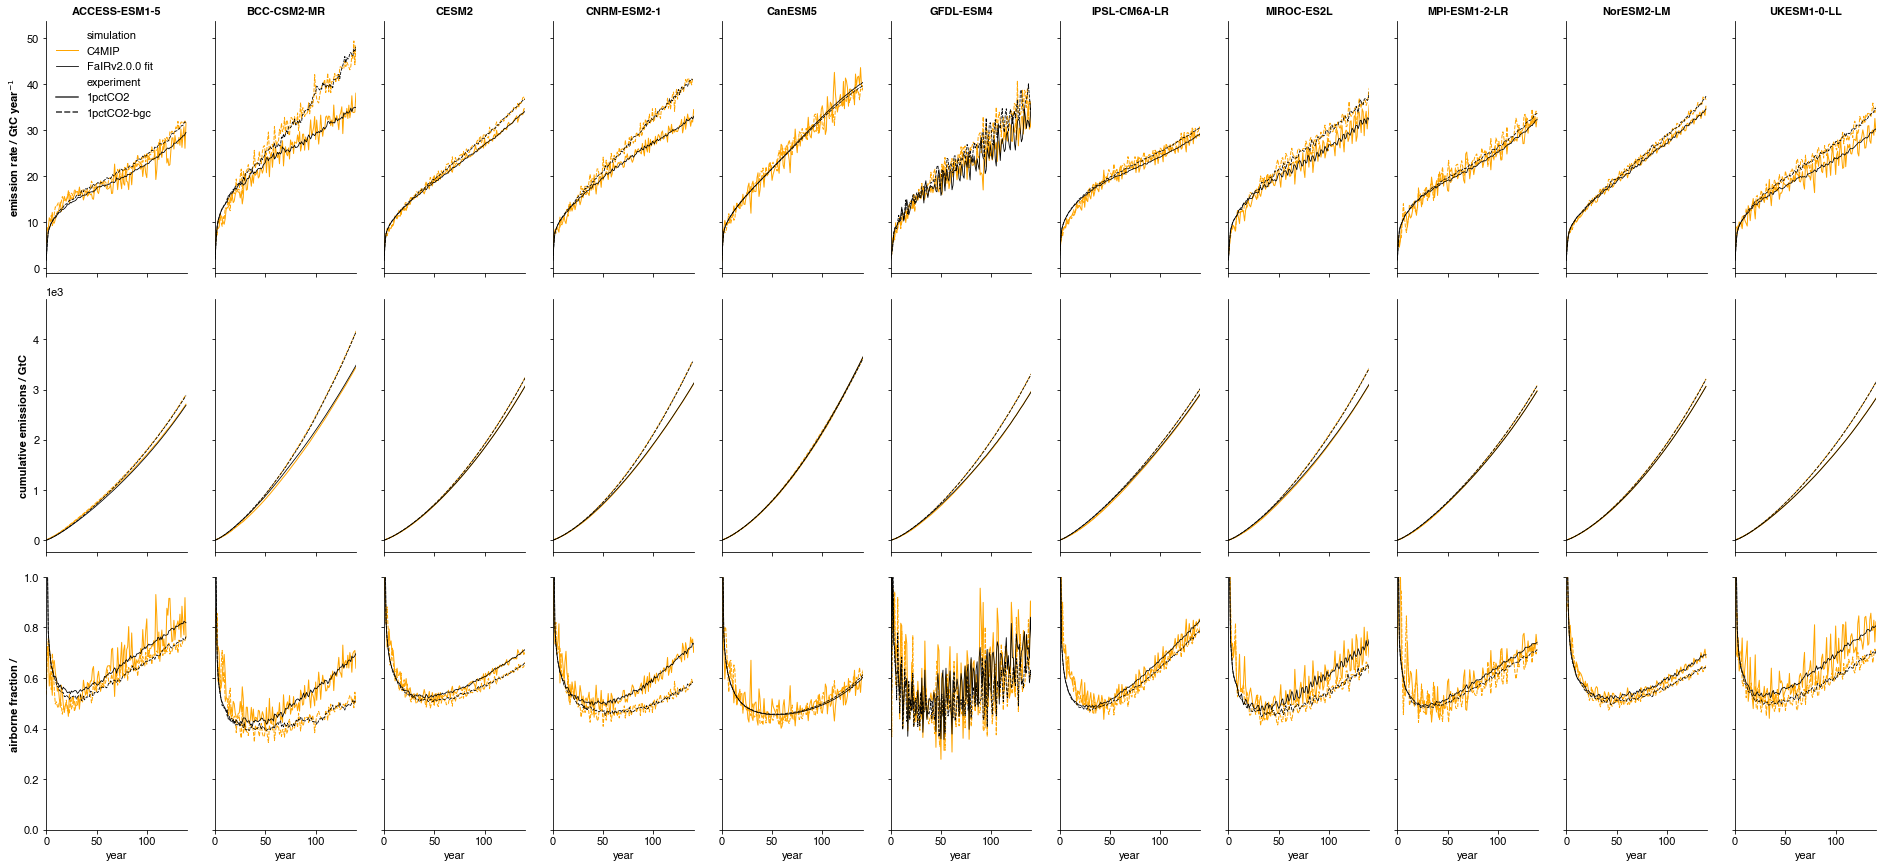

In [23]:
def custom_facet(x,y,**kwargs):
    if kwargs['label']=='C4MIP':
        plt.plot(x,y,**kwargs,zorder=10)
    elif kwargs['label']=='FaIR_full':
        plt.plot(x,y,**kwargs,marker='.',lw=0,ms=2)

g = sn.relplot(data=paper_plot_data,
               x='time',
               y='value',
               row='variable',
               col='climate_model',
               hue='simulation',
               style='experiment',
               kind='line',
               size='simulation',
               sizes=[1,0.8],
               palette=['orange','k'],
               facet_kws={'sharey': 'row', 'margin_titles': True, 'legend_out': False},
               height=4,
               aspect=0.6,
               )

g.set(xlim=[0,140]).set_titles(col_template="{col_name}",fontweight='bold', row_template="").set_axis_labels("year","")
g.fig.subplots_adjust(wspace=0.2, hspace=0.1)
[a.set_ylim(0,1) for a in g.axes[-1,:]]
[g.axes[i,0].set_ylabel(x,fontweight='bold') for i,x in enumerate(paper_plot_data.variable.unique())]
g.axes[0,0].legend()

[g.fig.savefig('../../docs/manuscript/figures/Fig4.'+x,dpi=600,bbox_inches='tight') for x in ['png','pdf']]
''